In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
spotify_song_data= pd.read_csv("song_data.csv")

In [3]:
song_data=spotify_song_data.copy()
song_data.head(3)

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0       0.00552         0.496   0.682          0.000029    8    0.0589   
1       0.01030         0.542   0.853          0.000000    3    0.1080   
2       0.00817         0.737   0.463          0.447000    0    0.2550   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324

In [ ]:
song_data.info()

In [7]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

song_data["popularity"]= [ 1 if i>=70 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    14384
1     4451
Name: popularity, dtype: int64

If song_popularity is higher than 70 (this is about %25 percent of data )we labeled it "1" and if is not we labeled it "0". So we have "1" for the popular songs and "0" for the unpopular ones.

In [9]:
#Top 10 songs and Ratings.
song_new =song_data.sort_values(by = "song_popularity", ascending = False).head(100)
melted = pd.melt(frame=song_new,id_vars = 'song_name', value_vars= ['song_popularity'])
melted2=melted.drop_duplicates(keep="first")
melted2

song_name         variable  value
0                                          Happier  song_popularity    100
12                          I Love It (& Lil Pump)  song_popularity     99
28                 Eastside (with Halsey & Khalid)  song_popularity     98
29                                  In My Feelings  song_popularity     98
30  Taki Taki (with Selena Gomez, Ozuna & Cardi B)  song_popularity     98
31                       Promises (with Sam Smith)  song_popularity     98
75                                      SICKO MODE  song_popularity     97
76                                    Falling Down  song_popularity     97
77                                      In My Mind  song_popularity     97
85                                    Lucid Dreams  song_popularity     97

In [10]:
#drop the data we don't use.
song_data.drop(["song_name"],axis=1,inplace=True)


In [11]:
song_data.corr()

song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.018899     -0.065181   
song_duration_ms        -0.018899          1.000000     -0.097882   
acousticness            -0.065181         -0.097882      1.000000   
danceability             0.104290         -0.104985     -0.182500   
energy                   0.001365          0.092688     -0.662639   
instrumentalness        -0.130907         -0.015188      0.173098   
key                     -0.013160         -0.004615     -0.002025   
liveness                -0.038937          0.016086     -0.082537   
loudness                 0.099442          0.016469     -0.557744   
audio_mode              -0.004969         -0.026328      0.064100   
speechiness              0.021479         -0.083447     -0.093574   
tempo                   -0.022672          0.012791     -0.136421   
time_signature           0.034983          0.000264     -0.157177   
audio_valence           -0.052895         -0.063421     -0.121670   
popularity               0.660385          0.005092     -0.101694   

                  danceability    energy  instrumentalness       key  \
song_popularity       0.104290  0.001365         -0.130907 -0.013160   
song_duration_ms     -0.104985  0.092688         -0.015188 -0.004615   
acousticness         -0.182500 -0.662639          0.173098 -0.002025   
danceability          1.000000  0.044373         -0.130483  0.007723   
energy                0.044373  1.000000         -0.205914  0.020416   
instrumentalness     -0.130483 -0.205914          1.000000 -0.009463   
key                   0.007723  0.020416         -0.009463  1.000000   
liveness             -0.090694  0.167143         -0.032887 -0.008193   
loudness              0.177639  0.755516         -0.390248  0.010452   
audio_mode           -0.106539 -0.051605         -0.014983 -0.169848   
speechiness           0.213728  0.062053         -0.081138  0.033639   
tempo                -0.121286  0.162448         -0.036934  0.003239   
time_signature        0.136391  0.146265         -0.069181 -0.008282   
audio_valence         0.332014  0.316742         -0.178570  0.025356   
popularity            0.117811  0.042833         -0.152954 -0.021929   

                  liveness  loudness  audio_mode  speechiness     tempo  \
song_popularity  -0.038937  0.099442   -0.004969     0.021479 -0.022672   
song_duration_ms  0.016086  0.016469   -0.026328    -0.083447  0.012791   
acousticness     -0.082537 -0.557744    0.064100    -0.093574 -0.136421   
danceability     -0.090694  0.177639   -0.106539     0.213728 -0.121286   
energy            0.167143  0.755516   -0.051605     0.062053  0.162448   
instrumentalness -0.032887 -0.390248   -0.014983    -0.081138 -0.036934   
key              -0.008193  0.010452   -0.169848     0.033639  0.003239   
liveness          1.000000  0.102450   -0.001035     0.090845  0.031876   
loudness          0.102450  1.000000   -0.058506     0.078164  0.129938   
audio_mode       -0.001035 -0.058506    1.000000    -0.111627  0.020448   
speechiness       0.090845  0.078164   -0.111627     1.000000  0.071685   
tempo             0.031876  0.129938    0.020448     0.071685  1.000000   
time_signature    0.013289  0.119241   -0.024042     0.057162  0.003978   
audio_valence     0.013789  0.199696   -0.004558     0.011046  0.037667   
popularity       -0.025308  0.145254   -0.019096     0.030528 -0.005206   

                  time_signature  audio_valence  popularity  
song_popularity         0.034983      -0.052895    0.660385  
song_duration_ms        0.000264      -0.063421    0.005092  
acousticness           -0.157177      -0.121670   -0.101694  
danceability            0.136391       0.332014    0.117811  
energy                  0.146265       0.316742    0.042833  
instrumentalness       -0.069181      -0.178570   -0.152954  
key                    -0.008282       0.025356   -0.021929  
liveness                0.013289       0.013789   -0.025308  
l

Correlation between loudness and energy is 0.8 which is a strong and correlation between loudness and accusticness is 0.6 which is a moderate. Except two of them all the correlations are quite low. When we compare the correlation between song_popularity and all other features, we don't see a strong correlation that gives us a clear information about popularity. So we need to continue to investigating.

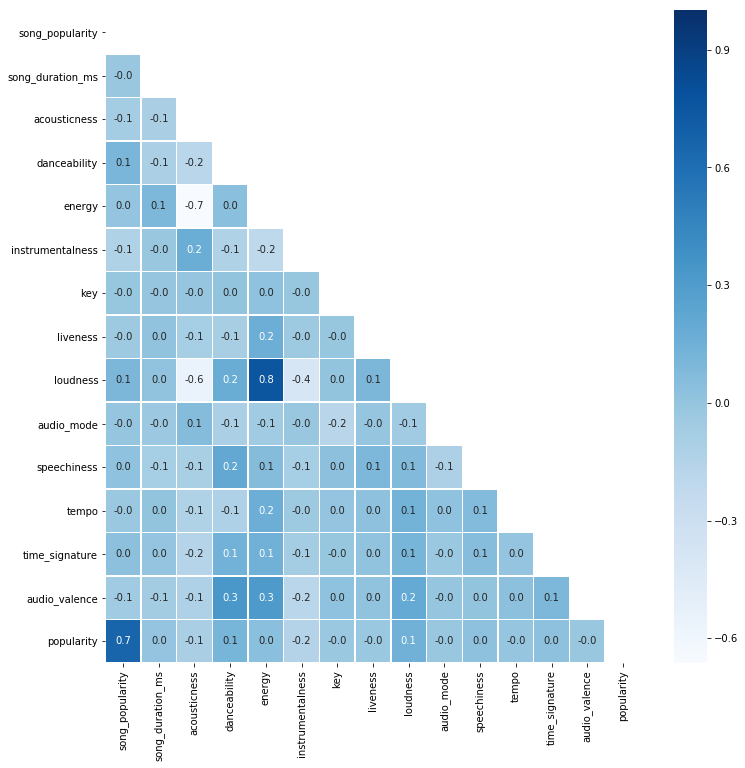

In [12]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

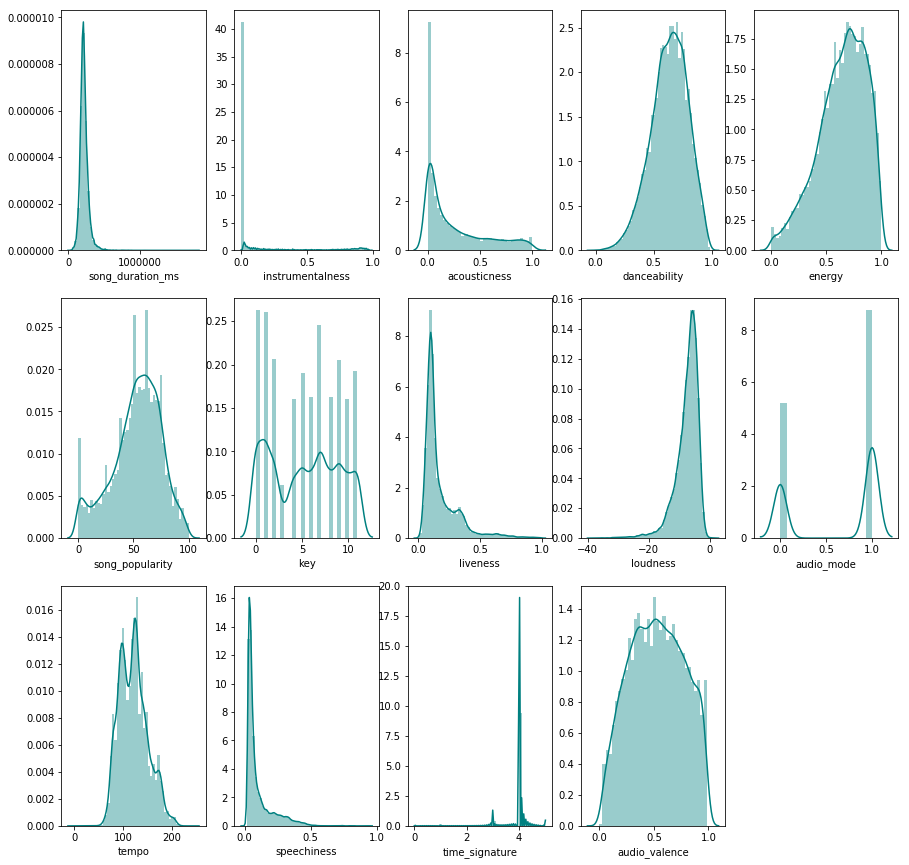

In [13]:
#Features Distribution
f, axes = plt.subplots(3, 5, figsize=(15, 15))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

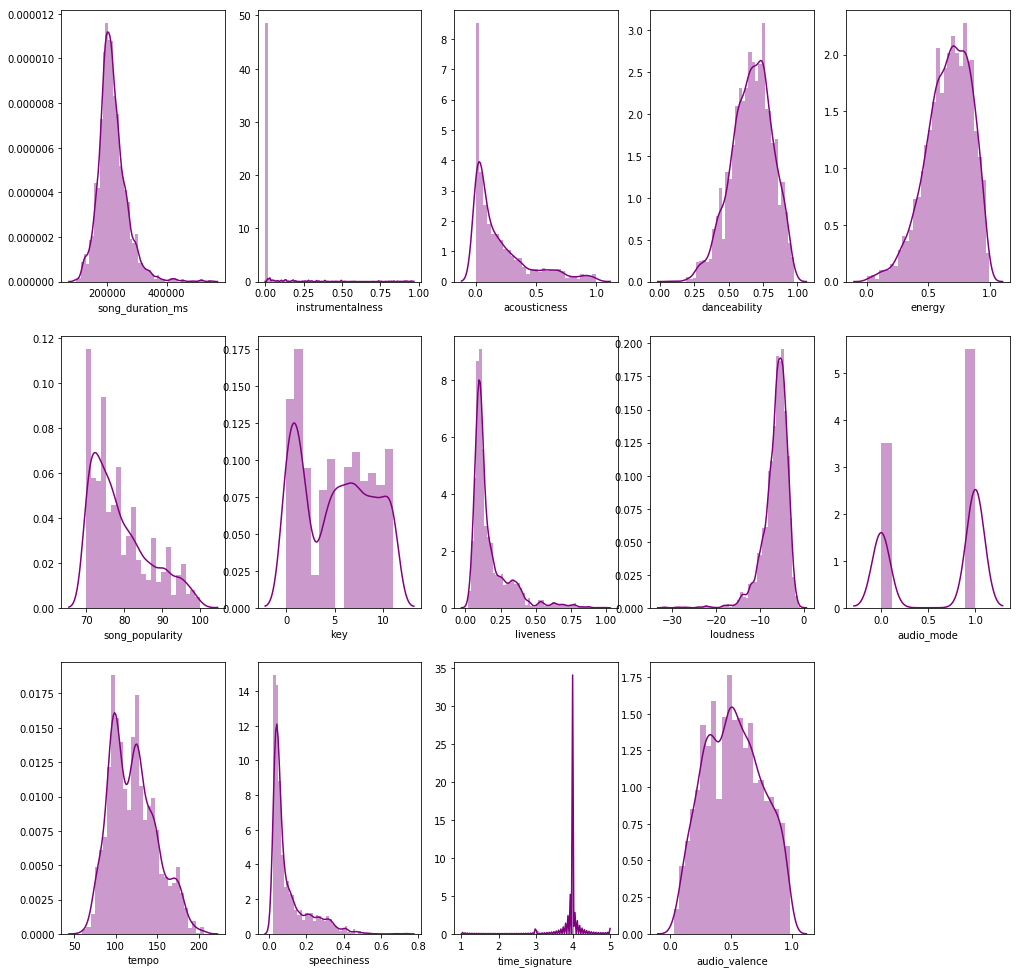

In [14]:
#Popular Songs Distribution
song_data1= song_data[song_data.popularity==1]
f, axes = plt.subplots(3, 5, figsize=(17, 17))
sns.distplot( song_data1["song_duration_ms"] , color="purple", ax=axes[0, 0])
sns.distplot( song_data1["instrumentalness"] , color="purple", ax=axes[0, 1])
sns.distplot( song_data1["acousticness"] , color="purple", ax=axes[0, 2])
sns.distplot( song_data1["danceability"] , color="purple", ax=axes[0, 3])
sns.distplot( song_data1["energy"] , color="purple", ax=axes[0, 4])
sns.distplot( song_data1["song_popularity"] , color="purple", ax=axes[1, 0])
sns.distplot( song_data1["key"] , color="purple", ax=axes[1, 1])
sns.distplot( song_data1["liveness"] , color="purple", ax=axes[1, 2])
sns.distplot( song_data1["loudness"] , color="purple", ax=axes[1, 3])
sns.distplot( song_data1["audio_mode"] , color="purple", ax=axes[1, 4])
sns.distplot( song_data1["tempo"] , color="purple", ax=axes[2, 0])
sns.distplot( song_data1["speechiness"] , color="purple", ax=axes[2, 1])
sns.distplot( song_data1["time_signature"] , color="purple", ax=axes[2, 2])
sns.distplot( song_data1["audio_valence"] , color="purple", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

Data distribution of both the general and popular songs display today's songs features like dancebility,energy,loudness and tempo are quite high. People like fast and loud music.
According to instrumentalness,liveness and speechness, Most of the songs are not live performances and they have lyrics.
Keys like 0,1,6,7,10 and 11 seems more effective.

People like Happy Songs or Sad Songs?

Audio valance describs the musical positiveness conveyed by a track (like sad or happiness - between 0 to 1). Lets suppose our threshold is 0.5.
In our data we have happy songs more. In the popular songs, numbers are pretty close to each other but when we look at top 500, we can say that negative songs are twice as much as positives.

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
#all songs
song_data3=song_data.copy()
song_data3["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data.audio_valence ]
song_data3["song_audio_valence"].value_counts()

Happy    10117
Sad       8718
Name: song_audio_valence, dtype: int64

In [23]:
#popular songs
song_data1["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data1.audio_valence ]
song_data1["song_audio_valence"].value_counts()

Happy    2322
Sad      2129
Name: song_audio_valence, dtype: int64

In [24]:
#top 500
song_data2_new=song_data1[song_data1["song_popularity"]>90]
song_data2_new["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data2_new.audio_valence ]
song_data2_new["song_audio_valence"].value_counts()

Sad      332
Happy    167
Name: song_audio_valence, dtype: int64

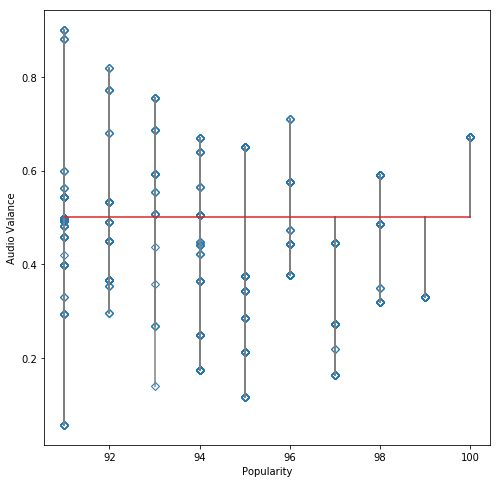

In [25]:
song_data2= song_data2_new[song_data2_new.popularity==1]
a=song_data2.iloc[:,0]
a.to_numpy()
b=song_data2.iloc[:,13]
b.to_numpy()
plt.figure(figsize=[8,8])
markerline, stemlines, baseline = plt.stem(
    a, b, linefmt='grey', markerfmt='D', bottom=0.5)
markerline.set_markerfacecolor('none')
plt.xlabel("Popularity")
plt.ylabel("Audio Valance")
plt.show()

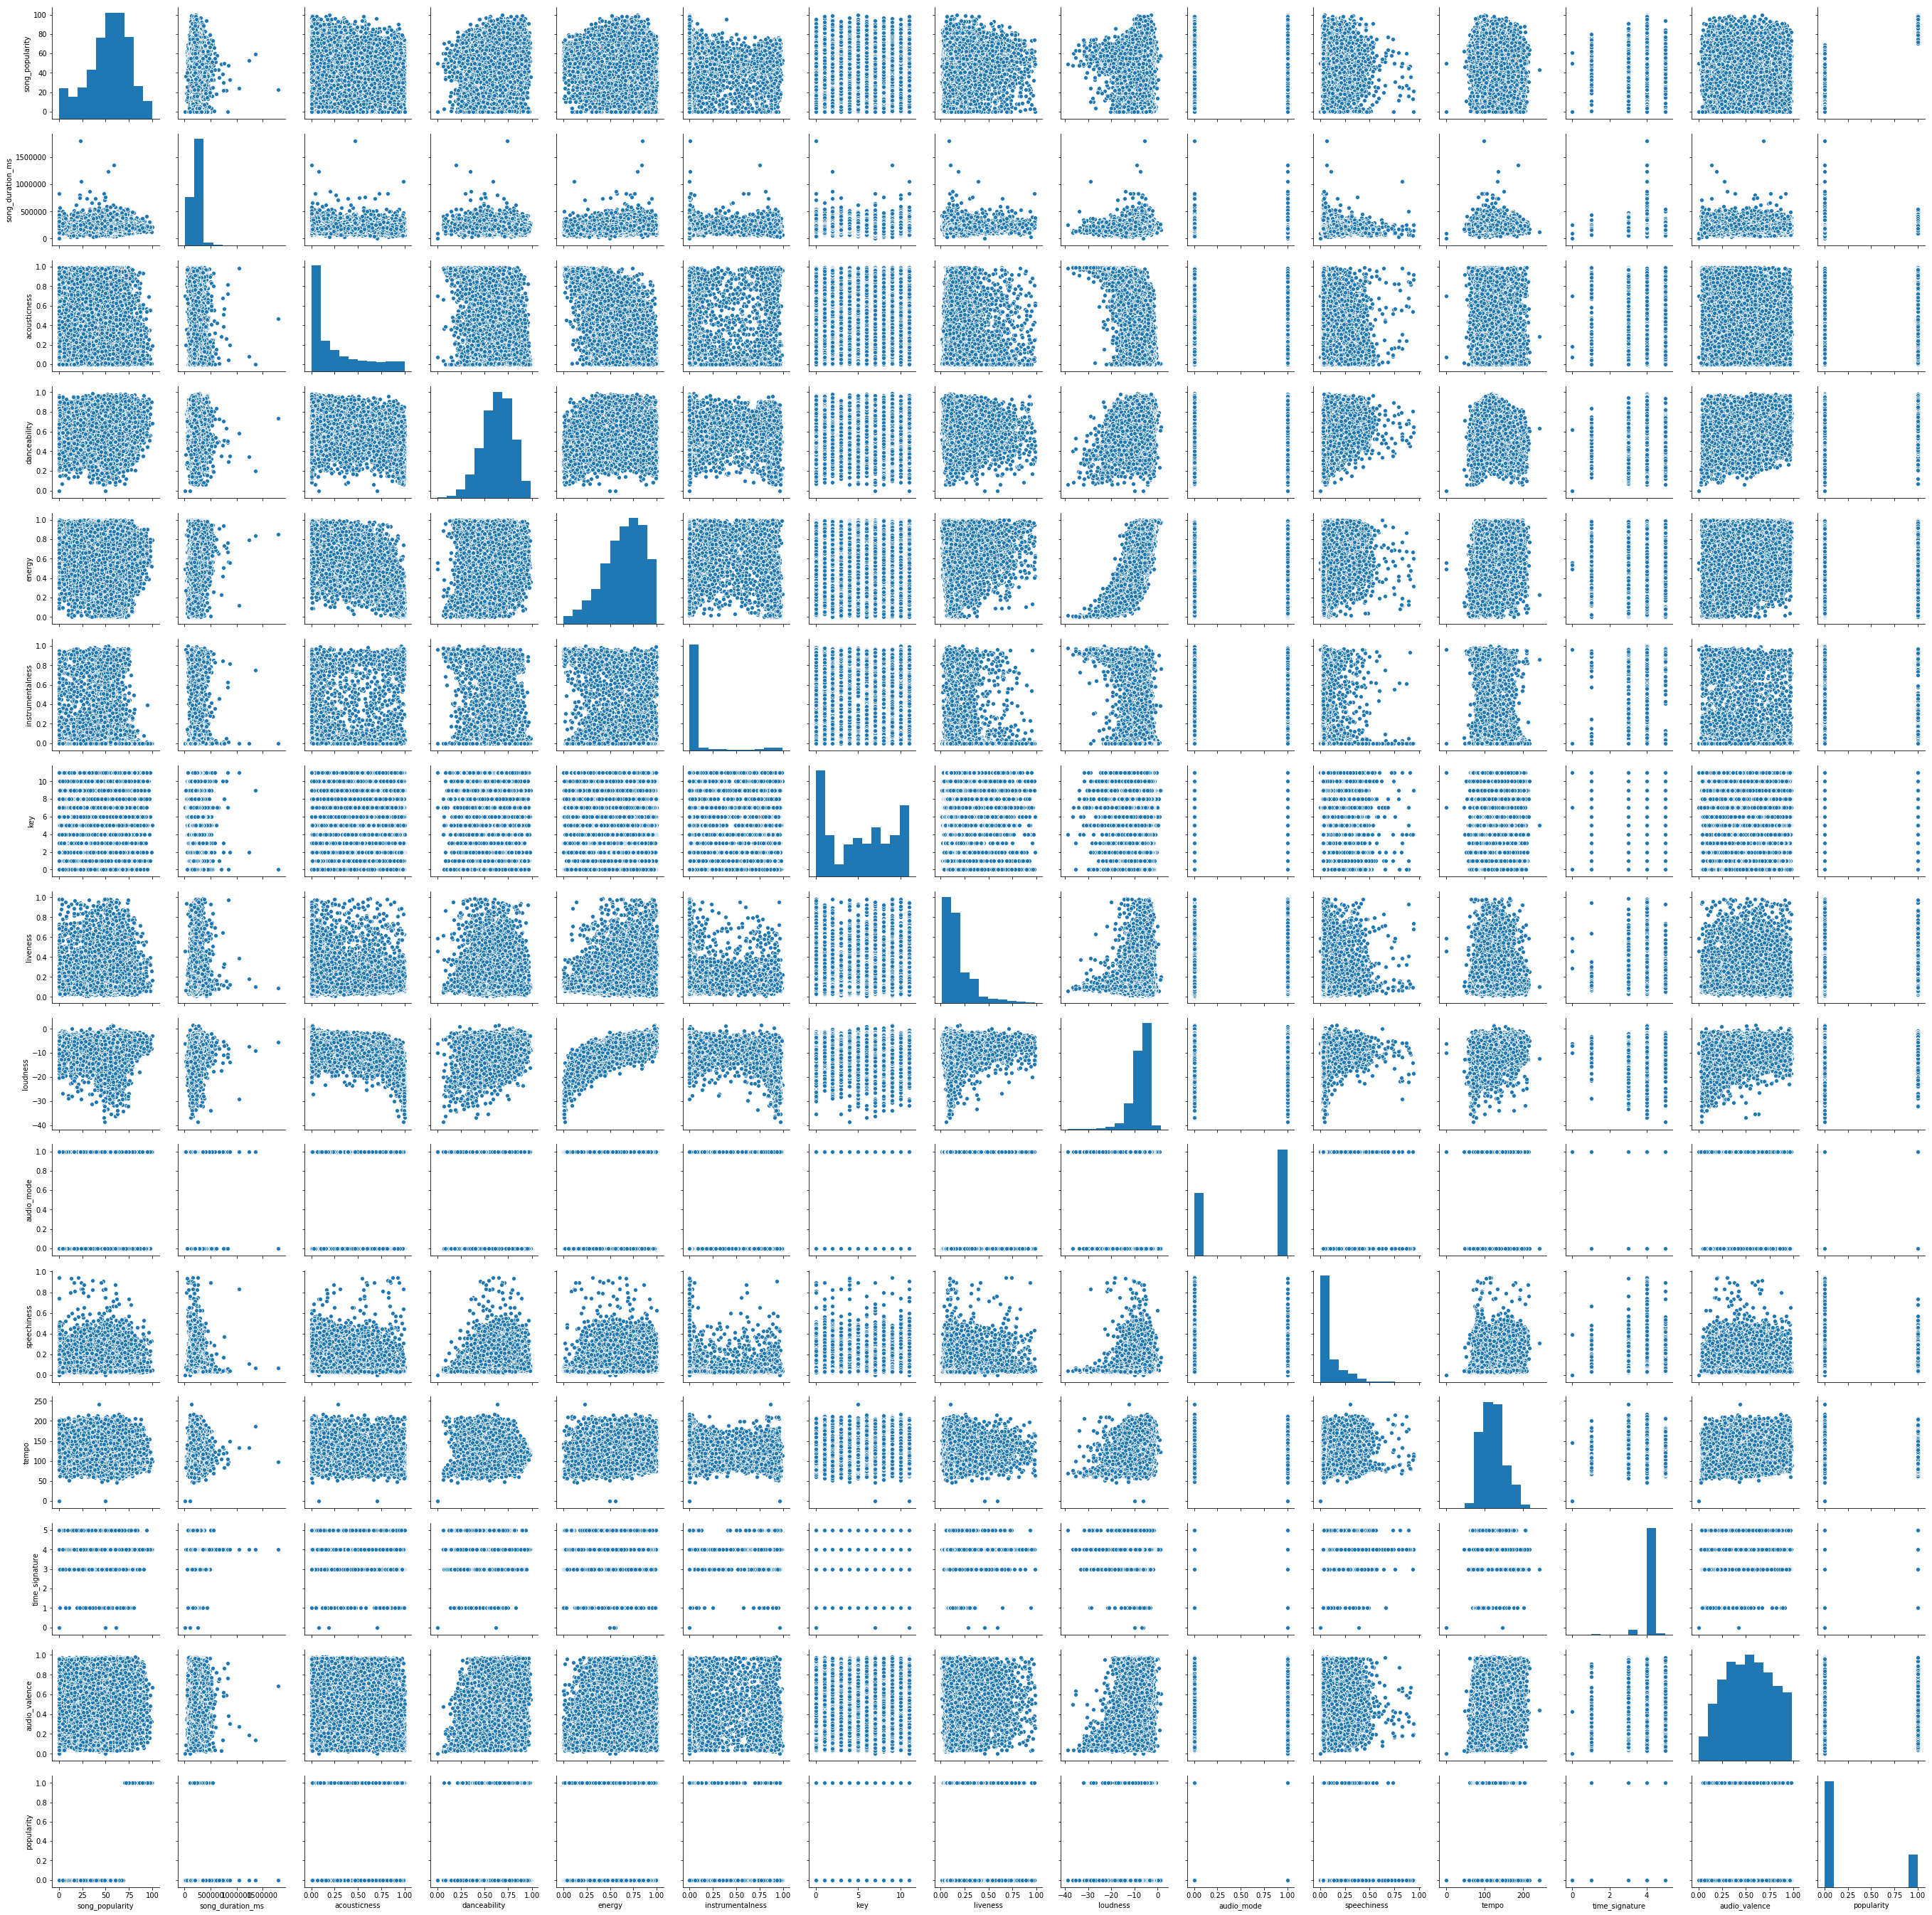

In [26]:
sns.pairplot(song_data)
plt.show()

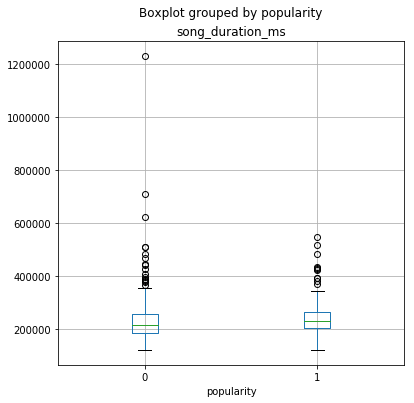

In [27]:
song=song_data.head(500)
song.boxplot(column='song_duration_ms',by='popularity',figsize=(6,6))
plt.show() 

In [ ]:
conda install -c https://conda.anaconda.org/plotly plotly

In [36]:
#Tempo of Popular and Unpopular Songs
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df5 = song_data.tempo[song_data["popularity"]>0]
df6 = song_data.tempo[song_data["popularity"]<1]
trace1 = go.Histogram(
    x=df5,
    opacity=0.80,
    name = "1",
    marker=dict(color='rgba(255,255,0,0.3)'))
trace2 = go.Histogram(
    x=df6,
    opacity=0.70,
    name = "0",
    marker=dict(color='rgba(255,0,255,0.3)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title='',
                   xaxis=dict(title='Popular Songs'),
                   yaxis=dict( title='Tempo'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)